## EDA (Exploração de Dados) — Plots

Estas células dependem de `data_br`, `data_usa` e `data_usa_br` (execute as seções anteriores antes).


             roe  debt_to_equity  profit_margins       beta    market_cap  \
count  30.000000       30.000000       30.000000  30.000000  3.000000e+01   
mean    0.168144       94.861067        0.193059   0.470033  9.605959e+10   
std     0.100941       91.217325        0.191038   0.298889  1.040922e+11   
min    -0.009850        0.078000       -0.016230   0.035000  6.749097e+09   
25%     0.102395       35.386750        0.077452   0.307500  2.744782e+10   
50%     0.159740       77.350000        0.151540   0.352500  5.393529e+10   
75%     0.205068       96.653500        0.271337   0.526250  1.328641e+11   
max     0.479370      471.781000        0.765240   1.337000  4.149561e+11   

         net_income  total_equity    total_debt  
count  3.000000e+01  3.000000e+01  3.000000e+01  
mean   6.934903e+09  5.383694e+10  3.201501e+11  
std    9.103462e+09  5.681958e+10  6.963202e+11  
min   -7.074198e+09  4.987121e+09  1.134692e+09  
25%    1.284476e+09  1.426286e+10  2.620580e+10  
50%   

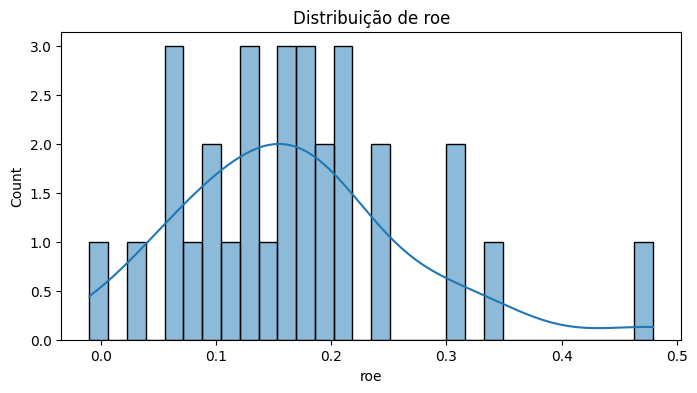

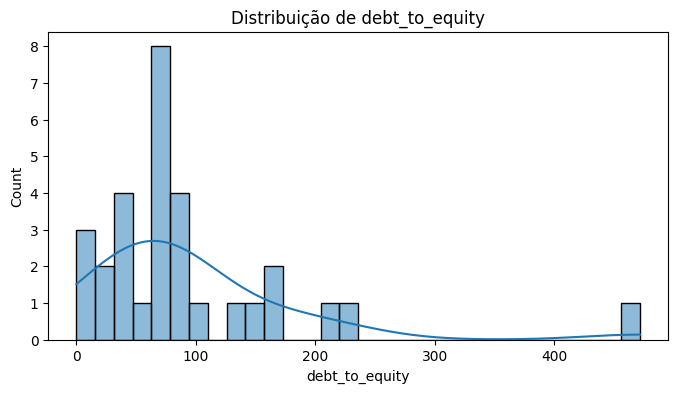

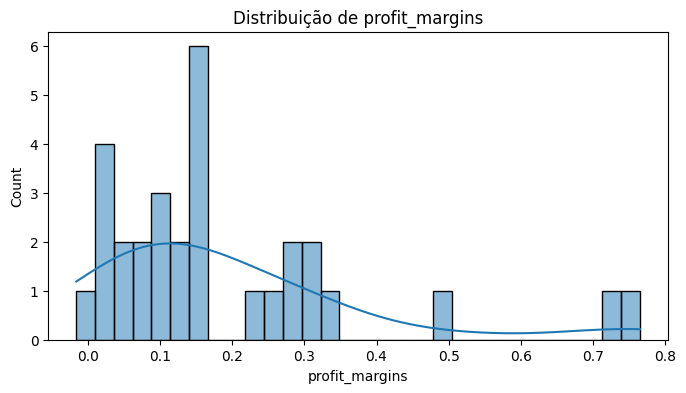

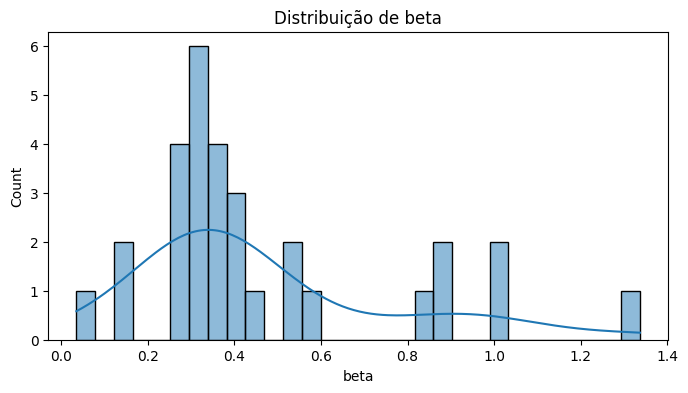

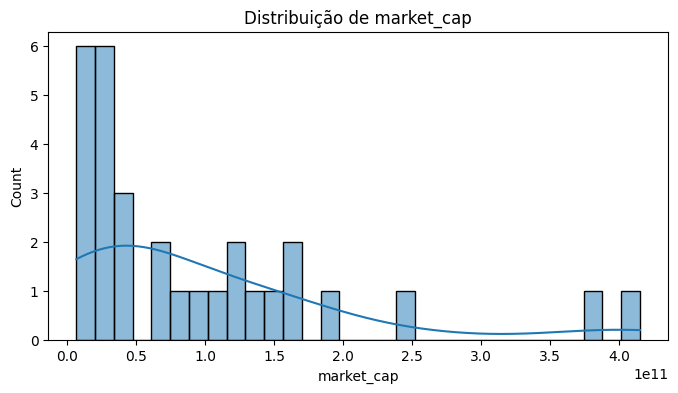

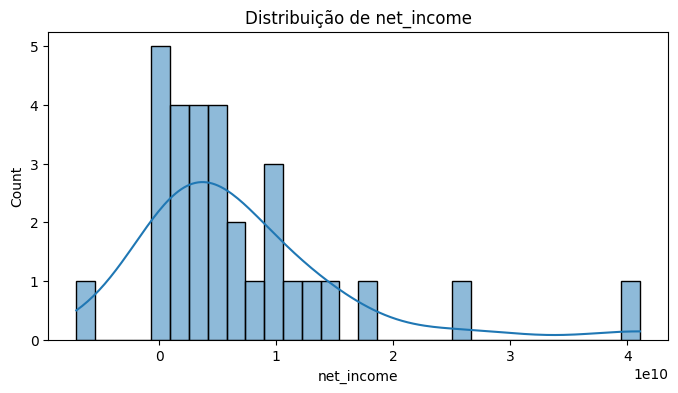

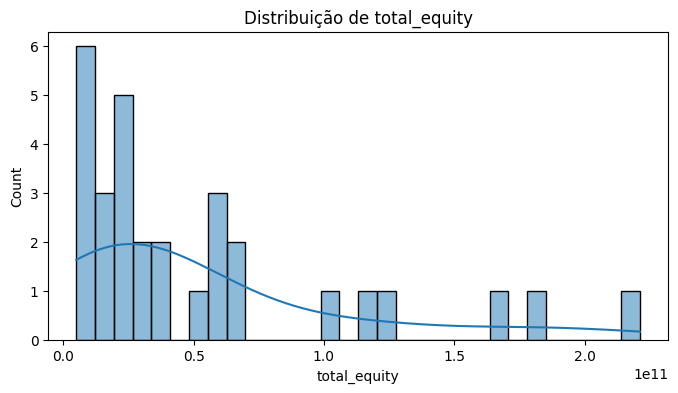

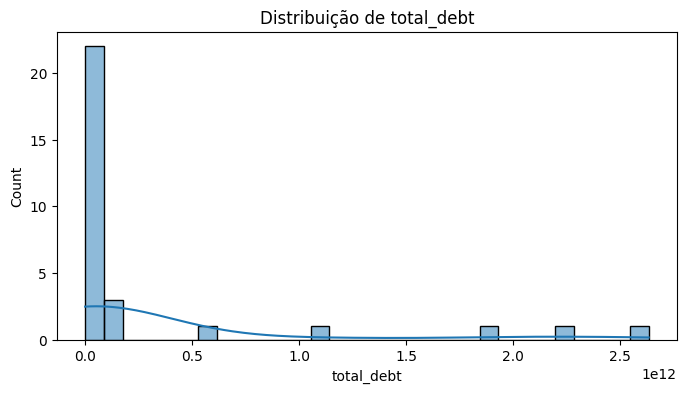

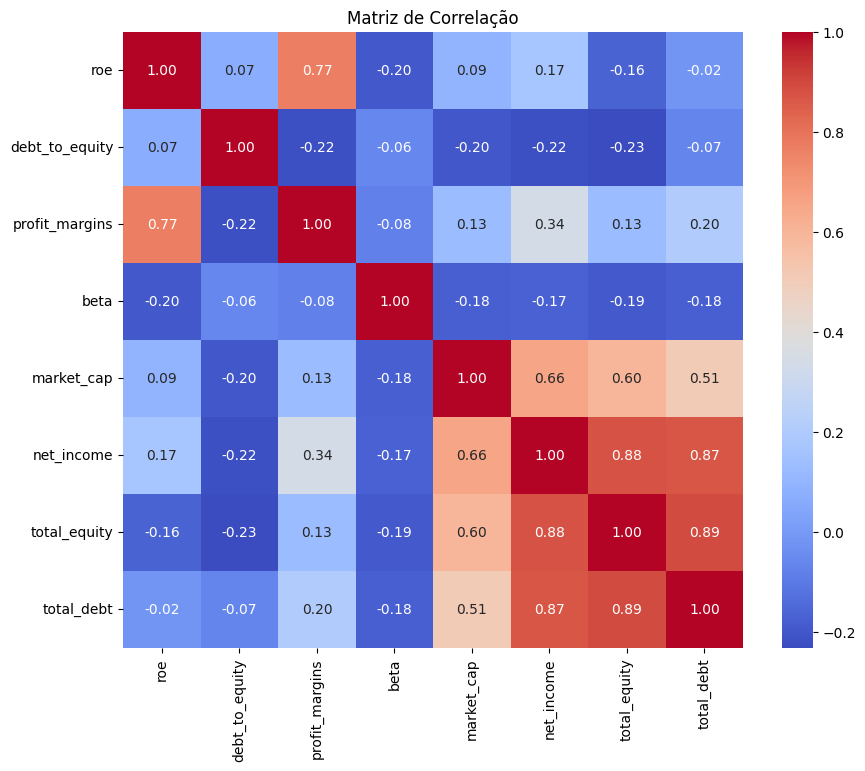

             roe  debt_to_equity  profit_margins       beta    market_cap  \
count  29.000000       29.000000       29.000000  29.000000  2.900000e+01   
mean    0.476053      100.871914        0.233834   1.026345  1.061120e+12   
std     0.498065      129.622226        0.135390   0.485995  1.243232e+12   
min     0.081770       10.584000        0.030790   0.364000  1.063270e+11   
25%     0.162110       32.661000        0.122190   0.504000  2.868394e+11   
50%     0.307270       64.851500        0.242960   1.001000  4.900760e+11   
75%     0.517550       75.577000        0.311180   1.298000  1.076361e+12   
max     1.939540      580.591000        0.524140   2.123000  4.567984e+12   

         net_income  total_equity    total_debt  
count  2.900000e+01  2.900000e+01  2.900000e+01  
mean   3.122909e+10  1.275161e+11  3.449589e+11  
std    3.244629e+10  1.515486e+11  8.342895e+11  
min    3.219000e+09 -3.797000e+09  1.612500e+10  
25%    8.711631e+09  2.474357e+10  5.537400e+10  
50%   

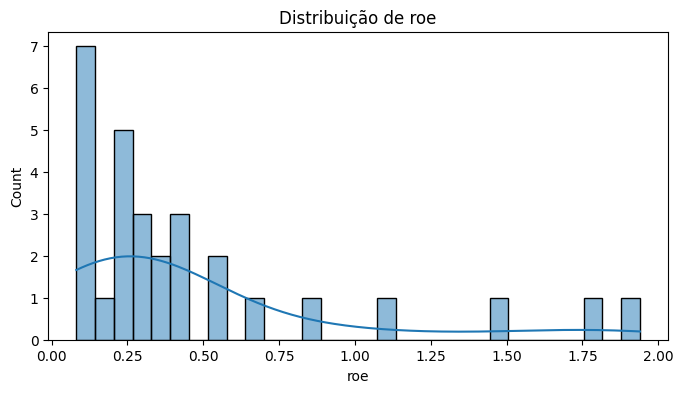

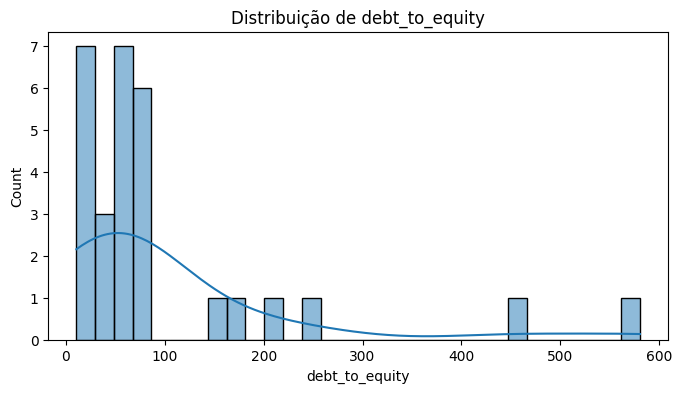

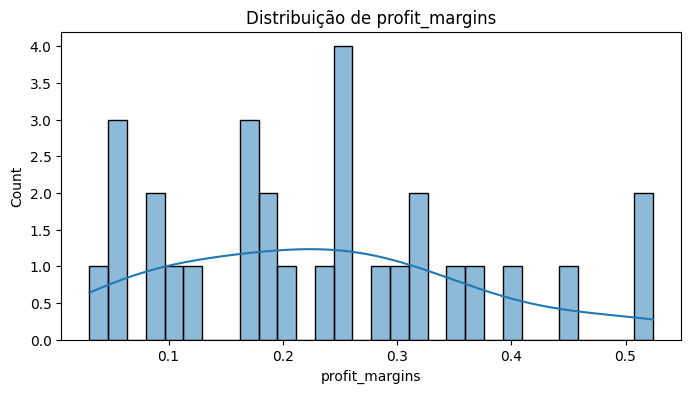

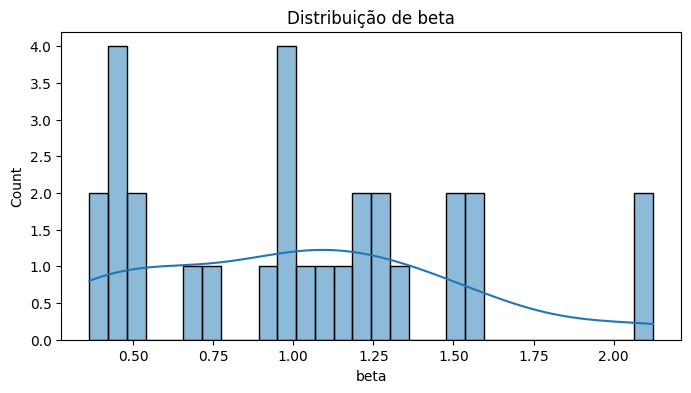

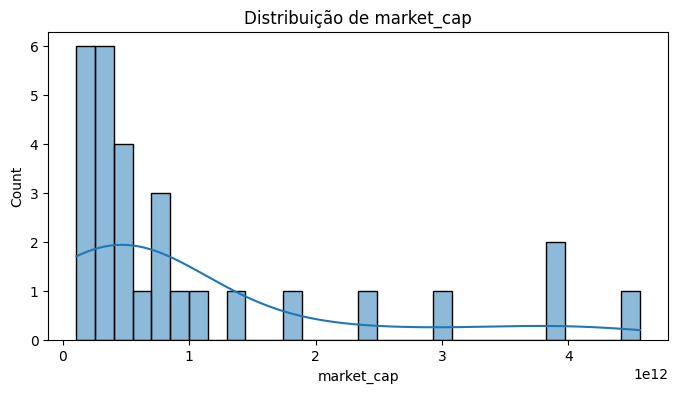

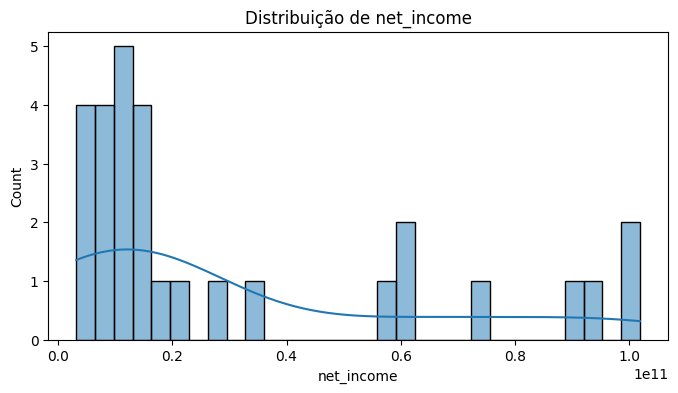

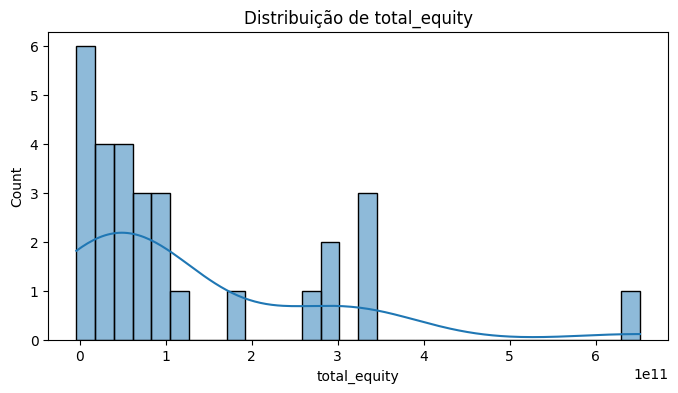

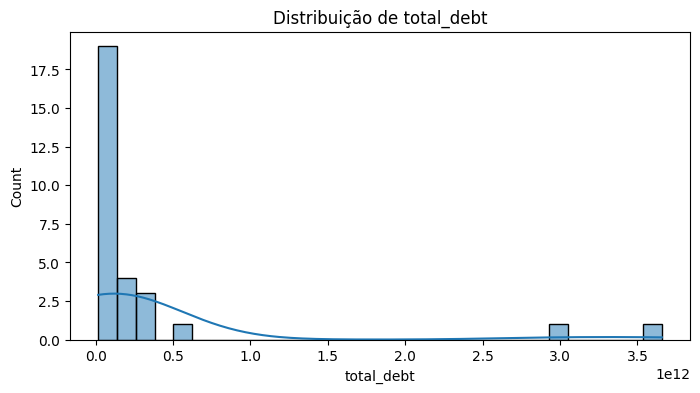

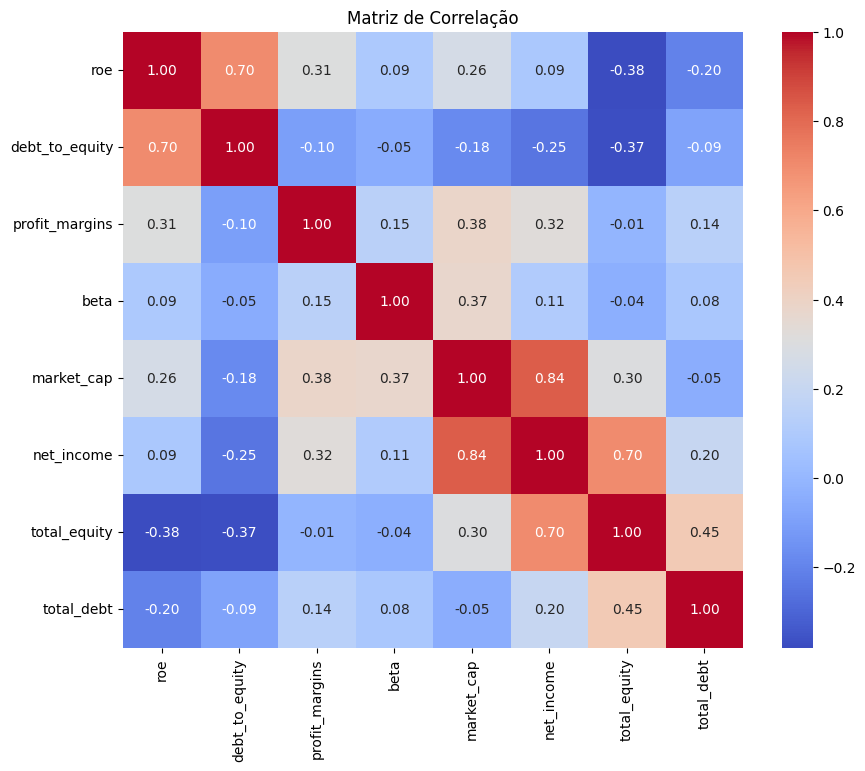

             roe  debt_to_equity  profit_margins       beta    market_cap  \
count  59.000000       59.000000       59.000000  59.000000  5.900000e+01   
mean    0.317631       97.165102        0.213101   0.743475  5.704114e+11   
std     0.386272      110.958267        0.165891   0.487209  9.941645e+11   
min    -0.009850        0.078000       -0.016230   0.035000  6.749097e+09   
25%     0.119995       35.023000        0.091340   0.352500  5.393529e+10   
50%     0.197635       67.866000        0.168680   0.524000  1.850804e+11   
75%     0.323055       90.214000        0.296360   1.022500  4.864657e+11   
max     1.939540      580.591000        0.765240   2.123000  4.567984e+12   

         net_income  total_equity    total_debt  
count  5.900000e+01  5.900000e+01  5.900000e+01  
mean   1.887611e+10  9.005211e+10  3.323443e+11  
std    2.645220e+10  1.186672e+11  7.606616e+11  
min   -7.074198e+09 -3.797000e+09  1.134692e+09  
25%    4.063147e+09  1.967623e+10  3.078460e+10  
50%   

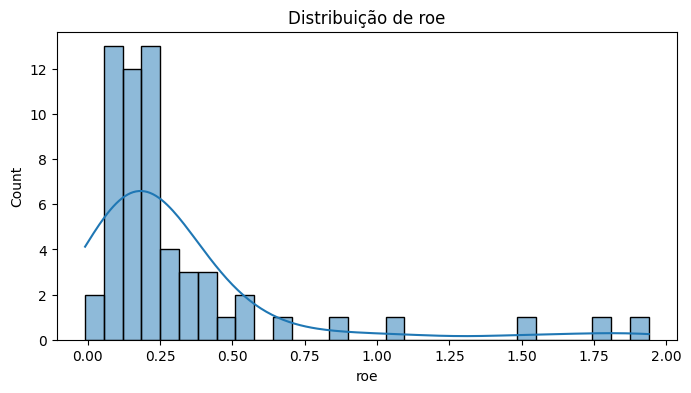

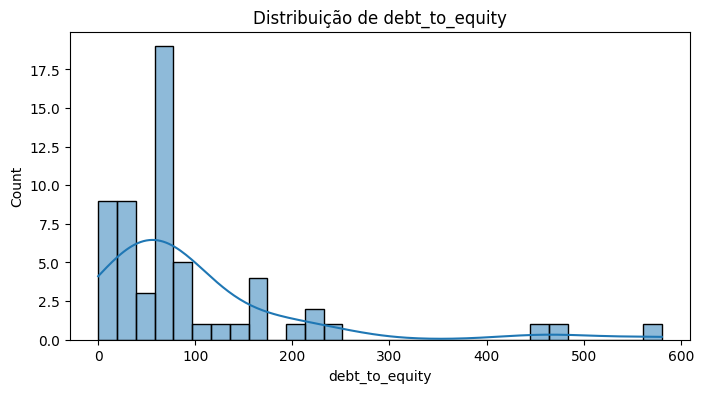

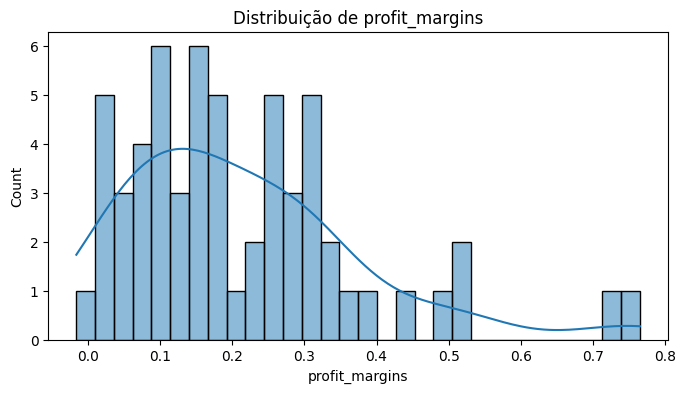

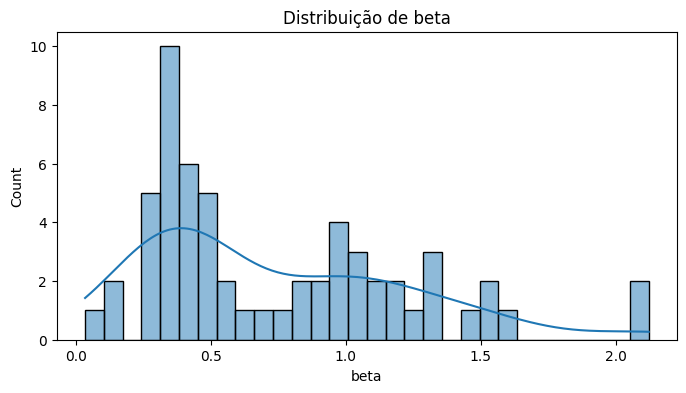

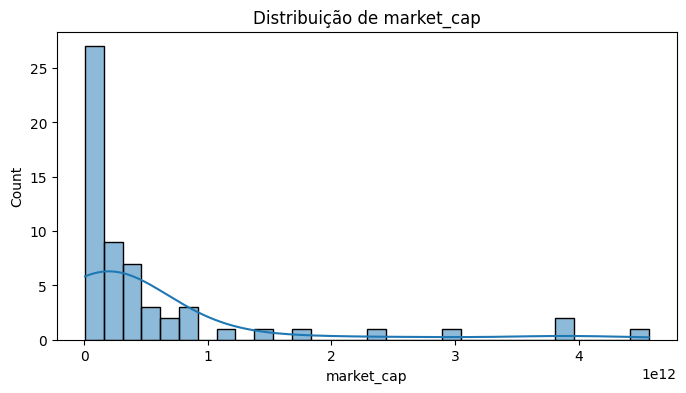

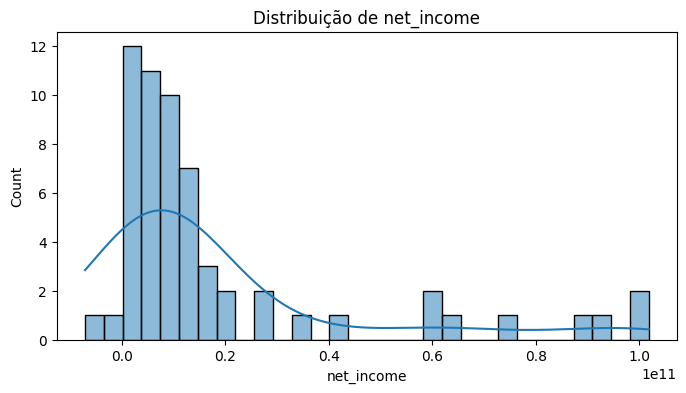

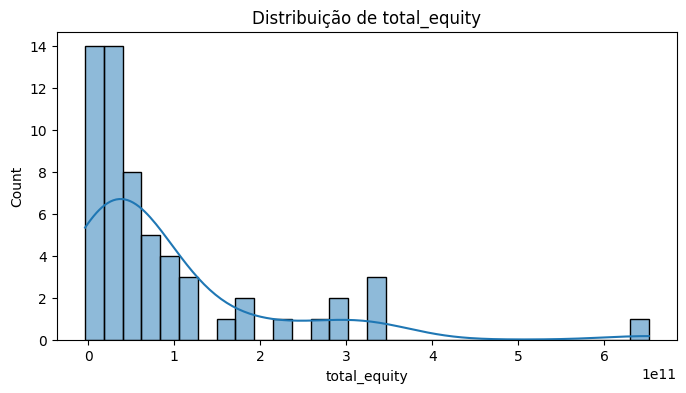

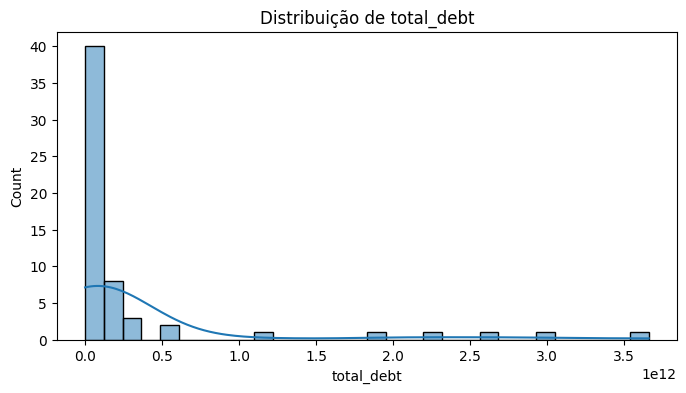

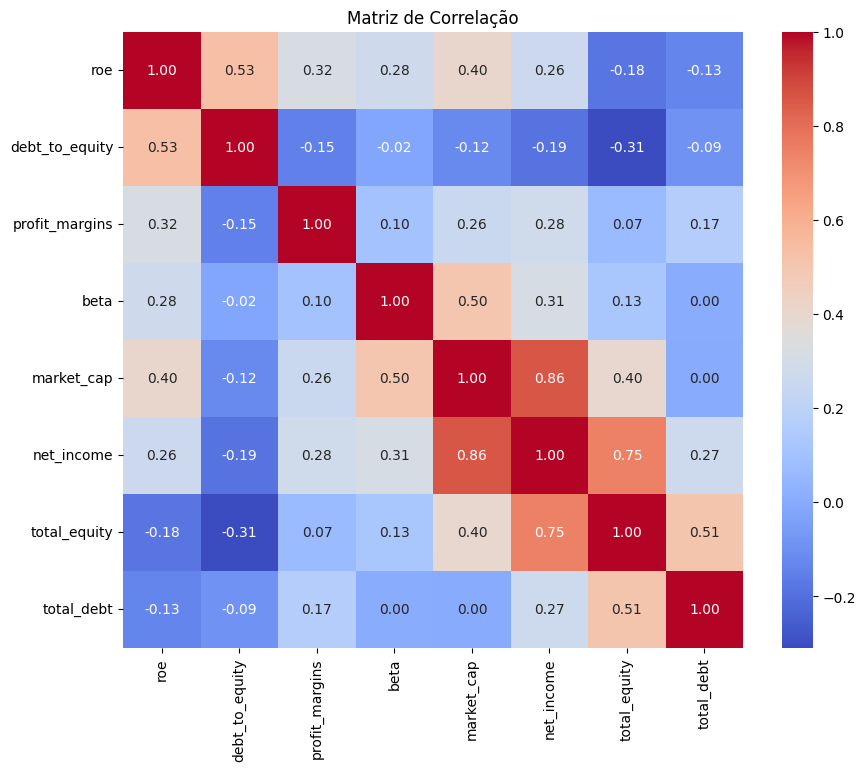

In [32]:
from src.eda import summary_statistics, plot_distribution, plot_correlation_matrix

# EDA — Brasil
summary_statistics(data_br[['roe','debt_to_equity','profit_margins','beta','market_cap',
                            'net_income','total_equity','total_debt']])
for col in ['roe','debt_to_equity','profit_margins','beta','market_cap',
            'net_income','total_equity','total_debt']:
    plot_distribution(data_br, col)
plot_correlation_matrix(data_br[['roe','debt_to_equity','profit_margins','beta','market_cap',
                                 'net_income','total_equity','total_debt']])

# EDA — EUA
summary_statistics(data_usa[['roe','debt_to_equity','profit_margins','beta','market_cap',
                             'net_income','total_equity','total_debt']])
for col in ['roe','debt_to_equity','profit_margins','beta','market_cap',
            'net_income','total_equity','total_debt']:
    plot_distribution(data_usa, col)
plot_correlation_matrix(data_usa[['roe','debt_to_equity','profit_margins','beta','market_cap',
                                  'net_income','total_equity','total_debt']])

# EDA — EUA + Brasil
summary_statistics(data_usa_br[['roe','debt_to_equity','profit_margins','beta','market_cap',
                                'net_income','total_equity','total_debt']])
for col in ['roe','debt_to_equity','profit_margins','beta','market_cap',
            'net_income','total_equity','total_debt']:
    plot_distribution(data_usa_br, col)
plot_correlation_matrix(data_usa_br[['roe','debt_to_equity','profit_margins','beta','market_cap',
                                     'net_income','total_equity','total_debt']])


# Análise de Clusters (KMeans) em Métricas Financeiras

Este notebook unifica os exemplos anteriores e executa KMeans com K = 4, 5 e 6 em três conjuntos de dados:
- Empresas do Brasil
- Empresas dos EUA
- Empresas dos EUA + Brasil

O código original foi mantido. Apenas os títulos e comentários explicativos foram traduzidos para português.


## Configuração Comum

As próximas células importam as funções utilitárias e definem configurações comuns (mantidas como no código original).


In [22]:
from src.kmean_modeling import calculate_inertia, apply_kmeans_and_visualize
from src.data_processing import fetch_financial_metrics
from src.preprocessing import create_preprocessor, preview_transformation
import pandas as pd
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Ajuste para o número de núcleos físicos


## Exemplo: Brasil

Conjunto de tickers de empresas brasileiras. Mantemos o mesmo fluxo de pré-processamento e aplicação de KMeans, variando K em 4, 5 e 6.


### Definir Tickers (Brasil)


In [23]:
tickers_br = [
    'VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA', 
    'ABEV3.SA', 'RENT3.SA', 'WEGE3.SA', 'ELET3.SA', 'SUZB3.SA', 
    'B3SA3.SA', 'GGBR4.SA', 'EGIE3.SA', 'HAPV3.SA', 'RDOR3.SA', 
    'TOTS3.SA', 'RADL3.SA', 'PRIO3.SA', 'LREN3.SA', 'MGLU3.SA', 
    'VIVT3.SA', 'SBSP3.SA', 'FLRY3.SA', 'GOAU4.SA', 'CPLE6.SA', 
    'ENGI11.SA', 'SANB11.SA', 'BPAC11.SA', 'CXSE3.SA', 'ASAI3.SA'
]


### Coletar Métricas Financeiras (Brasil)


In [24]:
data_br = fetch_financial_metrics(tickers_br)
data_br.head()


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt
0,VALE3.SA,0.12837,50.133,0.13814,1.022,250107740160,6.166000e+09,3.452800e+10,4.562400e+10
1,PETR4.SA,0.18483,92.443,0.15185,0.289,414956126208,7.528000e+09,5.935000e+10,1.222950e+11
2,ITUB4.SA,0.20809,NaN,0.31790,0.283,387382444032,4.108500e+10,2.212840e+11,2.633191e+12
3,BBDC4.SA,0.12346,NaN,0.23561,0.384,168208580608,1.725290e+10,1.689425e+11,1.900542e+12
4,BBAS3.SA,0.15581,NaN,0.30000,0.305,123187060736,2.635886e+10,1.842363e+11,2.214483e+12


### Pré-processamento (apenas ROE e Dívida/Patrimônio) — Brasil


In [25]:
num_cols = ['roe', 'debt_to_equity']
for col in num_cols:
    data_br[col] = pd.to_numeric(data_br[col], errors='coerce')
    data_br[col].fillna(data_br[col].median(), inplace=True)

preprocessor_br = create_preprocessor(num_cols=num_cols)
scaled_features_br = preview_transformation(preprocessor_br, data_br[num_cols])

df_processed_br = pd.DataFrame(scaled_features_br, columns=num_cols)
df_processed_br['ticker'] = data_br['ticker'].values
df_processed_br.head()



Shape original: (30, 2)
Shape transformado: (30, 2)
          0         1
0  0.282531  0.106116
1  0.397940  0.195812
2  0.445485  0.163815
3  0.272495  0.163815
4  0.338621  0.163815


C:\Users\andre\AppData\Local\Temp\ipykernel_25780\2812481413.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_br[col].fillna(data_br[col].median(), inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_25780\2812481413.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,roe,debt_to_equity,ticker
0,0.282531,0.106116,VALE3.SA
1,0.397940,0.195812,PETR4.SA
2,0.445485,0.163815,ITUB4.SA
3,0.272495,0.163815,BBDC4.SA
4,0.338621,0.163815,BBAS3.SA


### KMeans e Visualizações — Brasil (K = 4, 5, 6)



Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.169798       73.305923
1        0.204125      269.988750
2        0.358733       44.973750
3        0.065058       70.333889


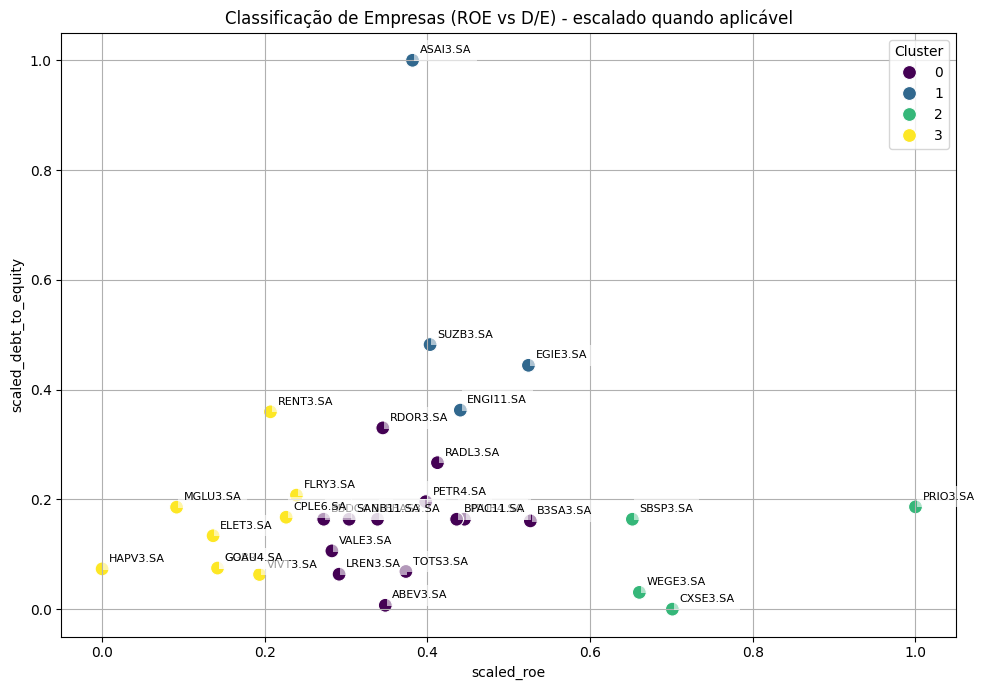


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.168775       61.018000
1        0.180315      176.601833
2        0.358733       44.973750
3        0.176870      471.781000
4        0.061764       57.918375


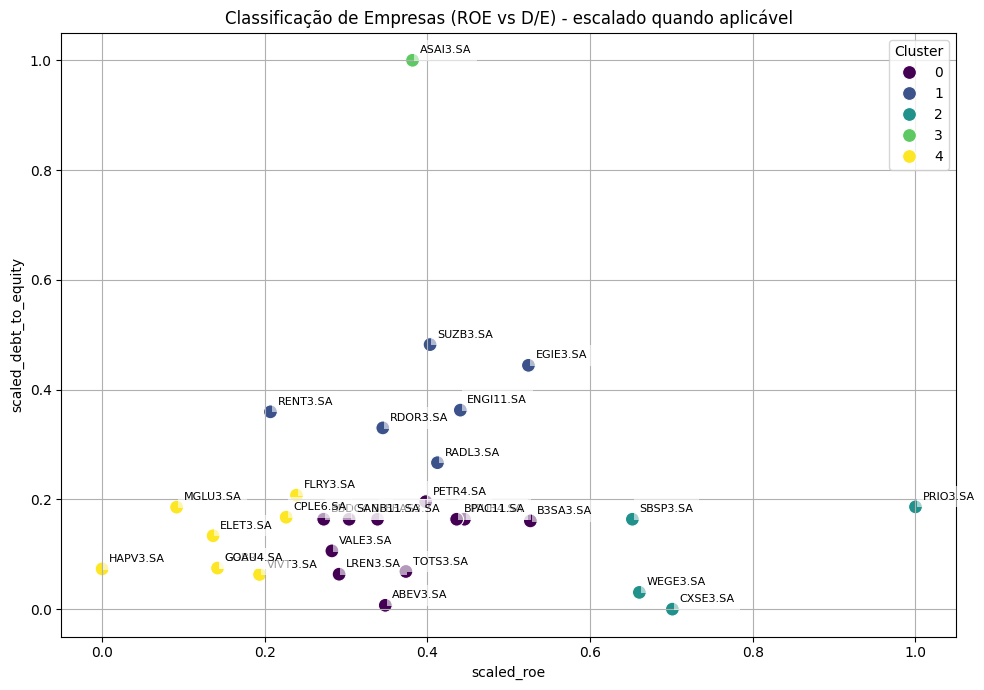


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.180315      176.601833
1        0.160877       59.528100
2        0.176870      471.781000
3        0.061764       57.918375
4        0.300828       41.956750
5        0.479370       87.985000


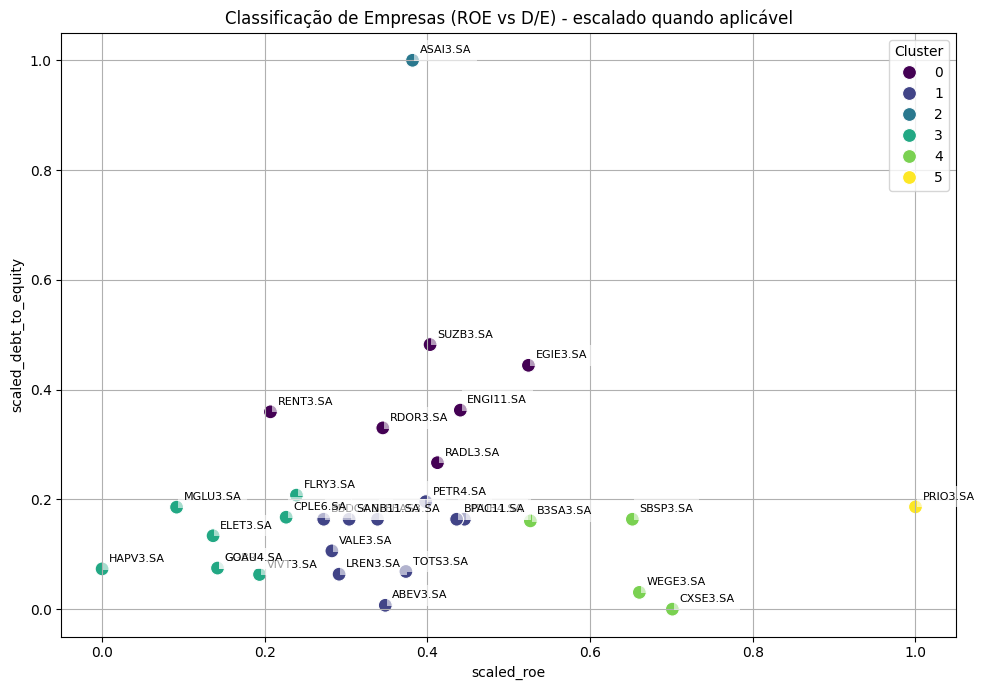

In [26]:
results_br_4 = apply_kmeans_and_visualize(df_processed_br, data_br, optimal_k=4)
results_br_5 = apply_kmeans_and_visualize(df_processed_br, data_br, optimal_k=5)
results_br_6 = apply_kmeans_and_visualize(df_processed_br, data_br, optimal_k=6)


## Exemplo: EUA

Conjunto de tickers de empresas norte-americanas. Fluxo idêntico, variando K em 4, 5 e 6.


### Definir Tickers (EUA)


In [27]:
tickers_usa = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META',
    'BRK-B', 'JPM', 'V', 'JNJ', 'WMT', 'UNH', 'LLY', 'XOM', 'MA',
    'PG', 'HD', 'BAC', 'DIS', 'NFLX', 'ADBE', 'CRM', 'CSCO', 'NKE',
    'KO', 'MCD', 'PFE', 'ORCL'
]


### Coletar Métricas Financeiras (EUA)


In [28]:
data_usa = fetch_financial_metrics(tickers_usa)
data_usa.head()


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt
0,AAPL,1.49814,154.486,0.24296,1.094,3829117222912,9.373600e+10,5.695000e+10,3.080300e+11
1,MSFT,0.33281,32.661,0.36146,1.023,3845548408832,1.018320e+11,3.434790e+11,2.755240e+11
2,GOOGL,0.34829,11.481,0.31118,1.000,2971275624448,1.001180e+11,3.250840e+11,1.251720e+11
3,AMZN,0.24770,47.808,0.10540,1.281,2341054709760,5.924800e+10,2.859700e+11,3.389240e+11
4,NVDA,1.09417,10.584,0.52414,2.123,4567983980544,7.288000e+10,7.932700e+10,3.227400e+10


### Pré-processamento (apenas ROE e Dívida/Patrimônio) — EUA


In [29]:
num_cols = ['roe', 'debt_to_equity']
for col in num_cols:
    data_usa[col] = pd.to_numeric(data_usa[col], errors='coerce')
    data_usa[col].fillna(data_usa[col].median(), inplace=True)

preprocessor_usa = create_preprocessor(num_cols=num_cols)
scaled_features_usa = preview_transformation(preprocessor_usa, data_usa[num_cols])

df_processed_usa = pd.DataFrame(scaled_features_usa, columns=num_cols)
df_processed_usa['ticker'] = data_usa['ticker'].values
df_processed_usa.head()



Shape original: (29, 2)
Shape transformado: (29, 2)
          0         1
0  0.762403  0.252457
1  0.135130  0.038731
2  0.143462  0.001574
3  0.089317  0.065304
4  0.544954  0.000000


C:\Users\andre\AppData\Local\Temp\ipykernel_25780\90749703.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_usa[col].fillna(data_usa[col].median(), inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_25780\90749703.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,roe,debt_to_equity,ticker
0,0.762403,0.252457,AAPL
1,0.135130,0.038731,MSFT
2,0.143462,0.001574,GOOGL
3,0.089317,0.065304,AMZN
4,0.544954,0.000000,NVDA


### KMeans e Visualizações — EUA (K = 4, 5, 6)



Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.258647        55.14263
1        1.939540       580.59100
2        1.306173       155.97000
3        0.692420       452.53400


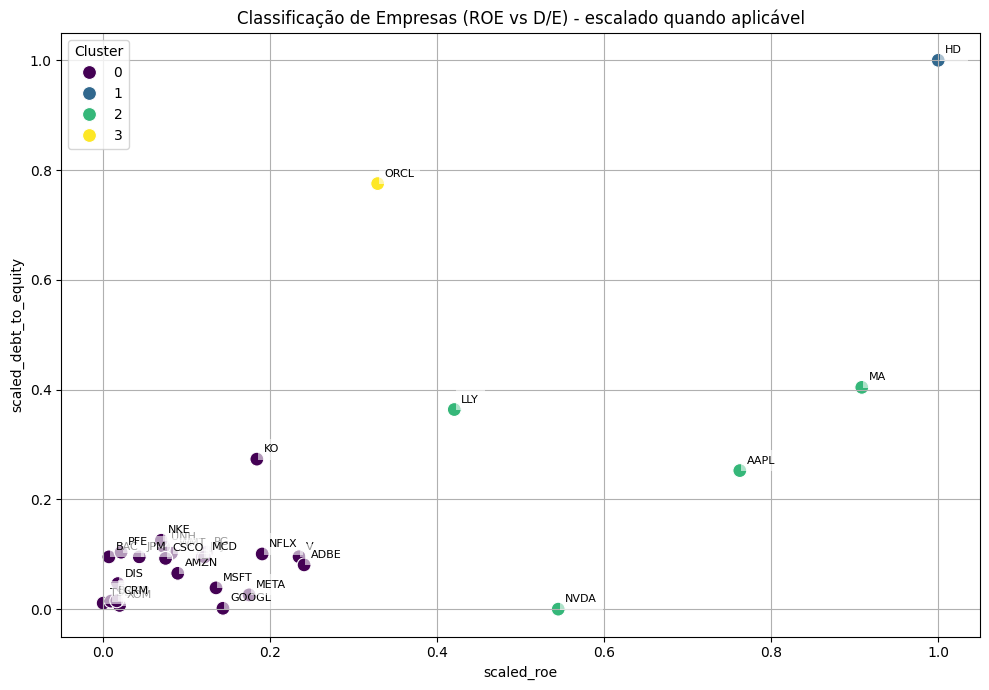


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.258647       55.142630
1        1.453927      135.329667
2        1.939540      580.591000
3        0.692420      452.534000
4        0.862910      217.891000


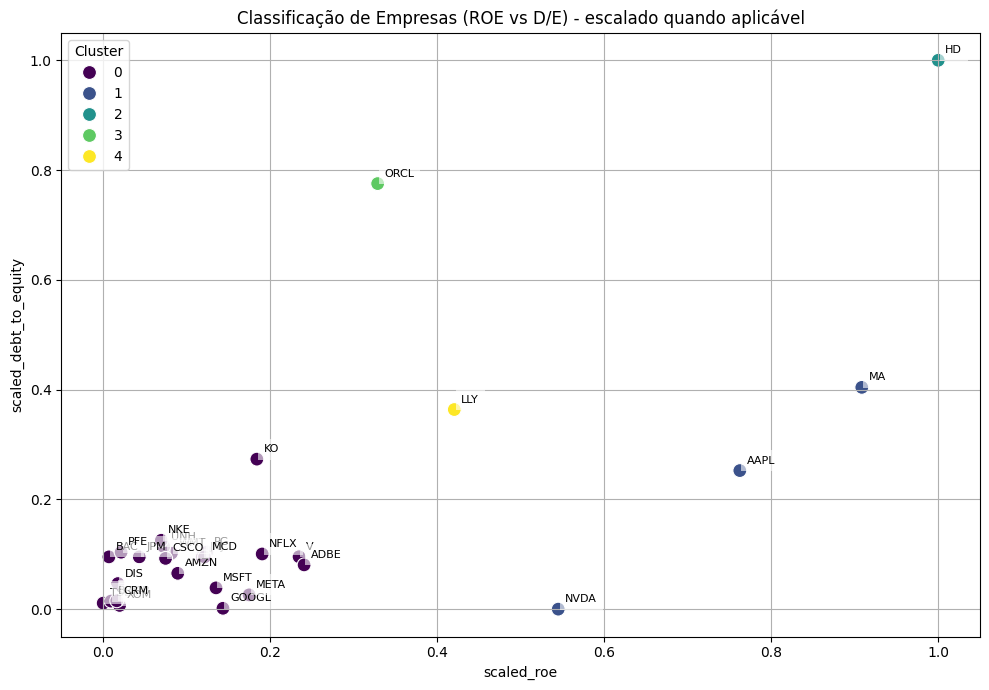


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.258647        55.14263
1        1.633805       197.70250
2        1.939540       580.59100
3        0.692420       452.53400
4        0.862910       217.89100
5        1.094170        10.58400


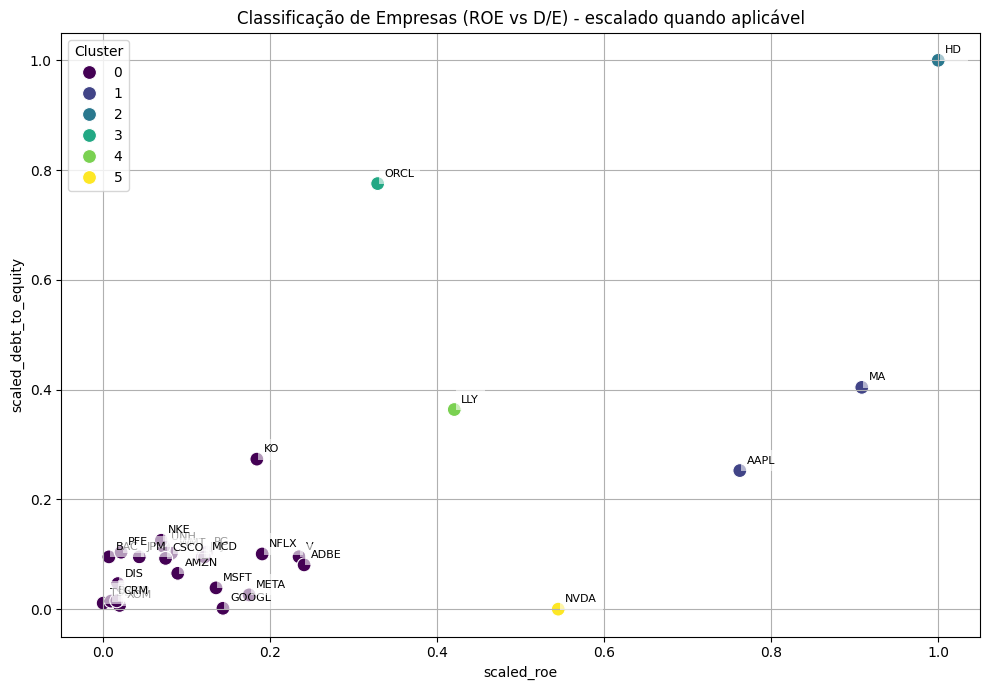

In [30]:
results_usa_4 = apply_kmeans_and_visualize(df_processed_usa, data_usa, optimal_k=4)
results_usa_5 = apply_kmeans_and_visualize(df_processed_usa, data_usa, optimal_k=5)
results_usa_6 = apply_kmeans_and_visualize(df_processed_usa, data_usa, optimal_k=6)


## Exemplo: EUA + Brasil

Conjunto unificado de tickers (EUA e Brasil). Fluxo idêntico, variando K em 4, 5 e 6.


### Definir Tickers (EUA + Brasil)


In [31]:
tickers_usa_br = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META',
    'BRK-B', 'JPM', 'V', 'JNJ', 'WMT', 'UNH', 'LLY', 'XOM', 'MA',
    'PG', 'HD', 'BAC', 'DIS', 'NFLX', 'ADBE', 'CRM', 'CSCO', 'NKE',
    'KO', 'MCD', 'PFE', 'ORCL',
    'VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA', 
    'ABEV3.SA', 'RENT3.SA', 'WEGE3.SA', 'ELET3.SA', 'SUZB3.SA', 
    'B3SA3.SA', 'GGBR4.SA', 'EGIE3.SA', 'HAPV3.SA', 'RDOR3.SA', 
    'TOTS3.SA', 'RADL3.SA', 'PRIO3.SA', 'LREN3.SA', 'MGLU3.SA', 
    'VIVT3.SA', 'SBSP3.SA', 'FLRY3.SA', 'GOAU4.SA', 'CPLE6.SA', 
    'ENGI11.SA', 'SANB11.SA', 'BPAC11.SA', 'CXSE3.SA', 'ASAI3.SA'
]


### Coletar Métricas Financeiras (EUA + Brasil)


In [32]:
data_usa_br = fetch_financial_metrics(tickers_usa_br)
data_usa_br.head()


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt
0,AAPL,1.49814,154.486,0.24296,1.094,3829117222912,9.373600e+10,5.695000e+10,3.080300e+11
1,MSFT,0.33281,32.661,0.36146,1.023,3845548408832,1.018320e+11,3.434790e+11,2.755240e+11
2,GOOGL,0.34829,11.481,0.31118,1.000,2971275624448,1.001180e+11,3.250840e+11,1.251720e+11
3,AMZN,0.24770,47.808,0.10540,1.281,2341054709760,5.924800e+10,2.859700e+11,3.389240e+11
4,NVDA,1.09417,10.584,0.52414,2.123,4567983980544,7.288000e+10,7.932700e+10,3.227400e+10


### Pré-processamento (apenas ROE e Dívida/Patrimônio) — EUA + Brasil


In [33]:
num_cols = ['roe', 'debt_to_equity']
for col in num_cols:
    data_usa_br[col] = pd.to_numeric(data_usa_br[col], errors='coerce')
    data_usa_br[col].fillna(data_usa_br[col].median(), inplace=True)

preprocessor_usa_br = create_preprocessor(num_cols=num_cols)
scaled_features_usa_br = preview_transformation(preprocessor_usa_br, data_usa_br[num_cols])

df_processed_usa_br = pd.DataFrame(scaled_features_usa_br, columns=num_cols)
df_processed_usa_br['ticker'] = data_usa_br['ticker'].values
df_processed_usa_br.head()



Shape original: (59, 2)
Shape transformado: (59, 2)
          0         1
0  0.773570  0.265985
1  0.175778  0.056128
2  0.183719  0.019643
3  0.132118  0.082220
4  0.566341  0.018098


C:\Users\andre\AppData\Local\Temp\ipykernel_25780\2598720651.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_usa_br[col].fillna(data_usa_br[col].median(), inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_25780\2598720651.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,roe,debt_to_equity,ticker
0,0.773570,0.265985,AAPL
1,0.175778,0.056128,MSFT
2,0.183719,0.019643,GOOGL
3,0.132118,0.082220,AMZN
4,0.566341,0.018098,NVDA


### KMeans e Visualizações — EUA + Brasil (K = 4, 5, 6)



Médias dos Clusters (por ROE e D/E quando disponíveis):


              roe  debt_to_equity
Cluster                          
0        0.205898       69.306827
1        1.306173      155.970000
2        0.434645      462.157500
3        1.939540      580.591000


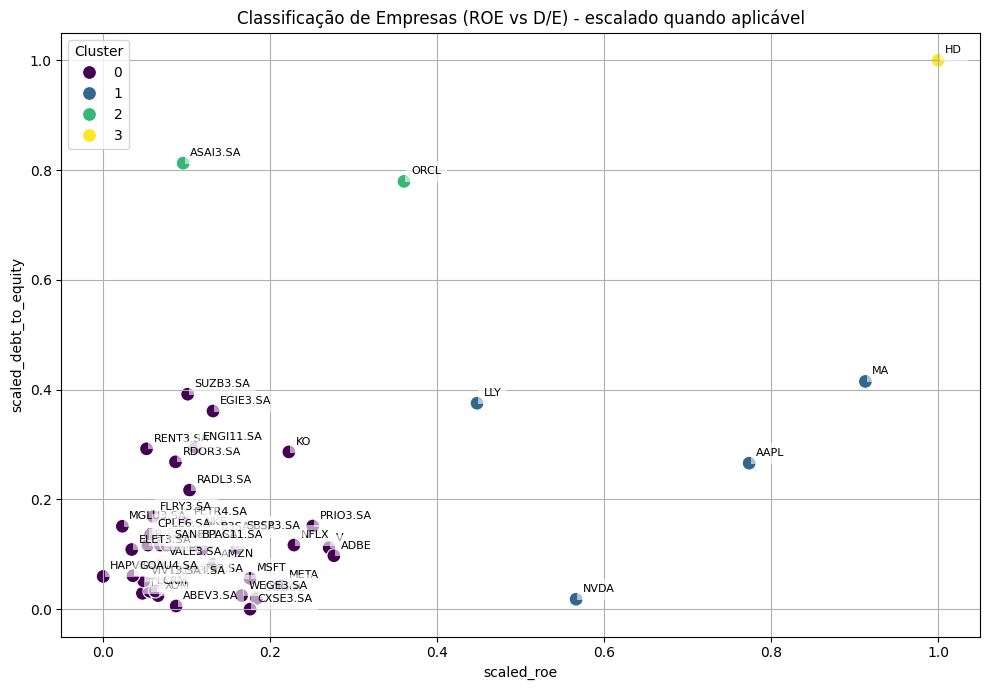


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.387887       56.906308
1        1.939540      580.591000
2        0.325825      340.345250
3        1.306173      155.970000
4        0.141356       65.597486


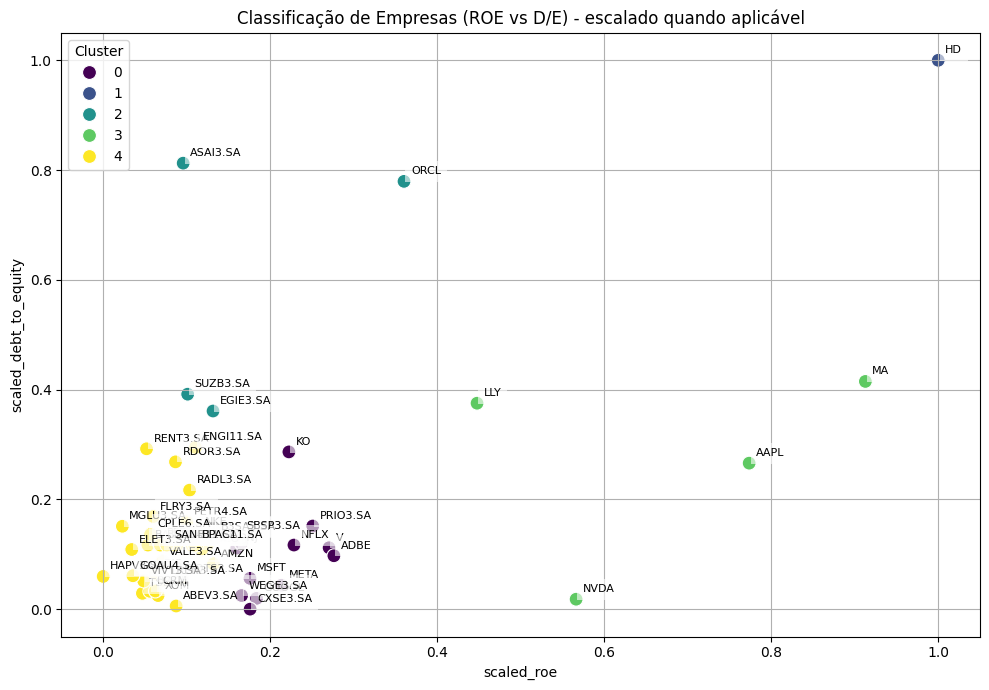


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.204469       52.843933
1        0.862910      217.891000
2        1.939540      580.591000
3        1.453927      135.329667
4        0.434645      462.157500
5        0.215084      175.139714


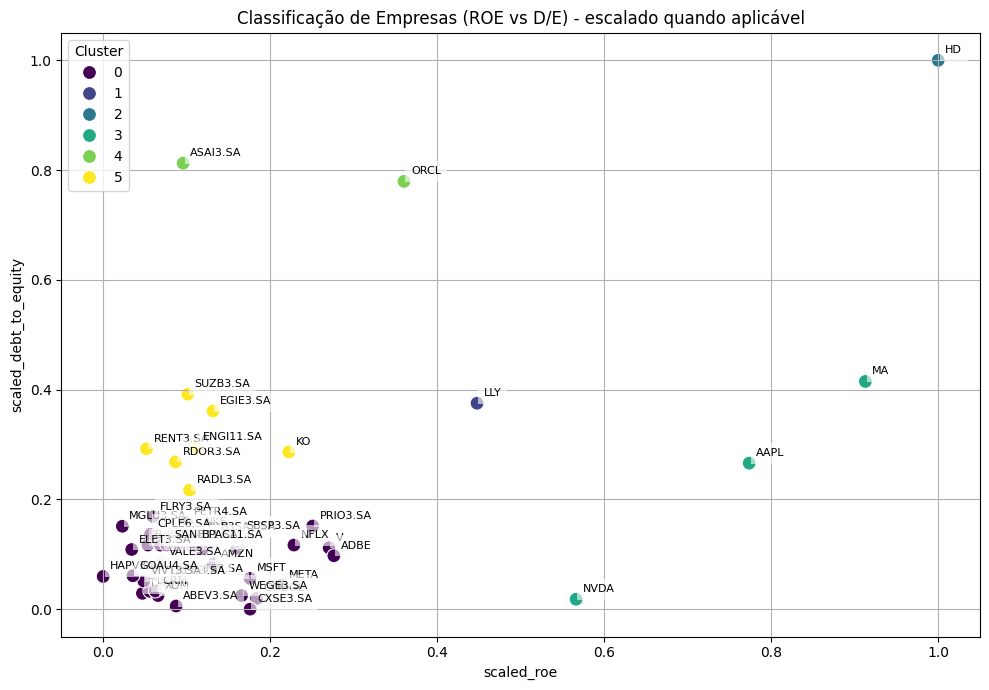

In [34]:
results_usa_br_4 = apply_kmeans_and_visualize(df_processed_usa_br, data_usa_br, optimal_k=4)
results_usa_br_5 = apply_kmeans_and_visualize(df_processed_usa_br, data_usa_br, optimal_k=5)
results_usa_br_6 = apply_kmeans_and_visualize(df_processed_usa_br, data_usa_br, optimal_k=6)


## Análise por Cluster (opcional)

As células abaixo (copiadas e traduzidas dos notebooks) ajudam a explorar estatísticas descritivas, boxplots e contagem de outliers por cluster. Você pode reexecutá-las para qualquer um dos resultados gerados acima.


### Cabeçalhos dos Clusters (exibir primeiras linhas por cluster)

Altere a variável `results_ref` para um dos resultados: `results_br_4`, `results_br_5`, `results_br_6`, `results_usa_4`, `results_usa_5`, `results_usa_6`, `results_usa_br_4`, `results_usa_br_5`, `results_usa_br_6`.


In [35]:
# Selecione qual resultado você quer inspecionar
results_ref = results_br_4  # mude aqui conforme necessário

for cluster_id in sorted(results_ref['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    display(results_ref[results_ref['Cluster'] == cluster_id].head())



Cluster 0:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
0,VALE3.SA,0.12837,50.133,0.13814,1.022,250107740160,6.166000e+09,3.452800e+10,4.562400e+10,0.282531,0.106116,0
1,PETR4.SA,0.18483,92.443,0.15185,0.289,414956126208,7.528000e+09,5.935000e+10,1.222950e+11,0.397940,0.195812,0
2,ITUB4.SA,0.20809,77.350,0.31790,0.283,387382444032,4.108500e+10,2.212840e+11,2.633191e+12,0.445485,0.163815,0
3,BBDC4.SA,0.12346,77.350,0.23561,0.384,168208580608,1.725290e+10,1.689425e+11,1.900542e+12,0.272495,0.163815,0
4,BBAS3.SA,0.15581,77.350,0.30000,0.305,123187060736,2.635886e+10,1.842363e+11,2.214483e+12,0.338621,0.163815,0



Cluster 1:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
9,SUZB3.SA,0.18742,227.437,0.15256,0.292,62660575232,-7.074198e+09,3.241558e+10,1.335205e+11,0.403234,0.481996,1
12,EGIE3.SA,0.24659,209.629,0.25270,0.368,32881887232,4.279349e+09,1.228040e+10,3.783190e+10,0.524181,0.444244,1
25,ENGI11.SA,0.20562,171.108,0.09726,0.327,22856523776,3.789678e+09,2.214322e+10,5.503843e+10,0.440436,0.362580,1
29,ASAI3.SA,0.17687,471.781,0.01209,0.410,12185629696,7.690000e+08,5.255000e+09,4.033800e+10,0.381669,1.000000,1



Cluster 2:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
7,WEGE3.SA,0.31330,14.482,0.15650,0.035,152723341312,6.042593e+09,2.312522e+10,1.836448e+10,0.660541,0.030536,2
17,PRIO3.SA,0.47937,87.985,0.73486,0.901,31025956864,1.030161e+10,2.592419e+10,2.982197e+10,1.000000,0.186361,2
21,SBSP3.SA,0.30910,77.350,0.27755,0.157,87202193408,9.579563e+09,3.692805e+10,4.403738e+10,0.651956,0.163815,2
28,CXSE3.SA,0.33316,0.078,0.76524,0.352,45209997312,3.765184e+09,1.288932e+10,1.134692e+09,0.701137,0.000000,2



Cluster 3:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
6,RENT3.SA,0.09141,169.658,0.05876,0.329,41124671488,1.813627e+09,2.634271e+10,6.090089e+10,0.206983,0.359506,3
8,ELET3.SA,0.05690,63.152,0.15169,0.281,118642245632,1.037812e+10,1.219998e+11,1.678716e+11,0.136442,0.133715,3
11,GGBR4.SA,0.05977,35.410,0.04731,0.853,33185959936,4.566317e+09,5.817379e+10,2.864071e+10,0.142308,0.074903,3
13,HAPV3.SA,-0.00985,34.667,-0.01623,0.315,17753890816,-6.493010e+08,4.867692e+10,2.482272e+10,0.000000,0.073328,3
19,MGLU3.SA,0.03496,87.740,0.01006,1.337,6749096960,4.487170e+08,1.131926e+10,2.599260e+10,0.091595,0.185842,3


### Estatísticas descritivas por cluster

Exibe média, mediana, desvio padrão, mínimo e máximo para `roe` e `debt_to_equity` do `results_ref` selecionado.


In [36]:
for cluster_id in sorted(results_ref['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    cluster_df = results_ref[results_ref['Cluster'] == cluster_id]
    print("Média:")
    print(cluster_df[['roe', 'debt_to_equity']].mean())
    print("Mediana:")
    print(cluster_df[['roe', 'debt_to_equity']].median())
    print("Desvio padrão:")
    print(cluster_df[['roe', 'debt_to_equity']].std())
    print("Mínimo:")
    print(cluster_df[['roe', 'debt_to_equity']].min())
    print("Máximo:")
    print(cluster_df[['roe', 'debt_to_equity']].max())



Cluster 0:
Média:
roe                0.169798
debt_to_equity    73.305923
dtype: float64
Mediana:
roe                0.16049
debt_to_equity    77.35000
dtype: float64
Desvio padrão:
roe                0.036514
debt_to_equity    39.787996
dtype: float64
Mínimo:
roe               0.12346
debt_to_equity    3.38800
dtype: float64
Máximo:
roe                 0.24775
debt_to_equity    155.84100
dtype: float64

Cluster 1:
Média:
roe                 0.204125
debt_to_equity    269.988750
dtype: float64
Mediana:
roe                 0.19652
debt_to_equity    218.53300
dtype: float64
Desvio padrão:
roe                 0.030700
debt_to_equity    136.566792
dtype: float64
Mínimo:
roe                 0.17687
debt_to_equity    171.10800
dtype: float64
Máximo:
roe                 0.24659
debt_to_equity    471.78100
dtype: float64

Cluster 2:
Média:
roe                0.358733
debt_to_equity    44.973750
dtype: float64
Mediana:
roe                0.32323
debt_to_equity    45.91600
dtype: float64
Desvio

### Boxplots por cluster

Visualiza a distribuição e possíveis outliers de `roe` e `debt_to_equity` por cluster no `results_ref`.


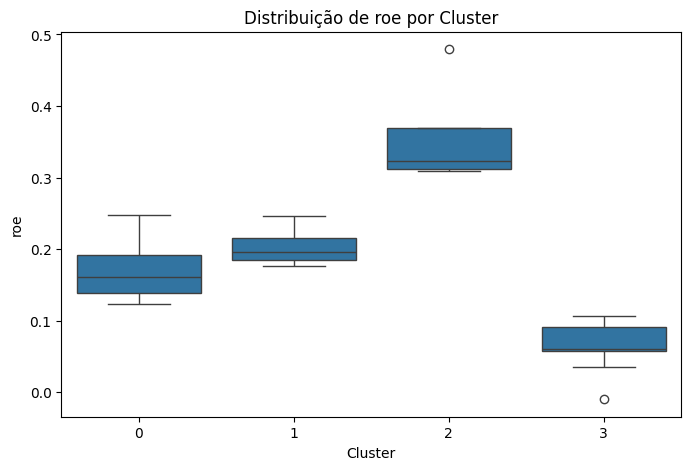

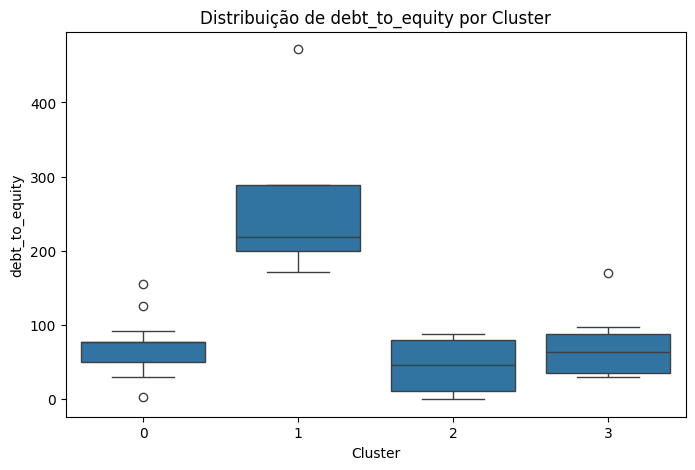

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in ['roe', 'debt_to_equity']:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Cluster', y=var, data=results_ref)
    plt.title(f'Distribuição de {var} por Cluster')
    plt.show()


## Conclusões e Especulações

- Brasil: a segmentação com K=4..6 indica grupos distintos por ROE e Dívida/Patrimônio. Há um cluster com ROE alto e D/E baixo (eficiência/qualidade), outro com D/E elevado (maior alavancagem) e grupos intermediários possivelmente associados a perfis setoriais mais defensivos.
- EUA: surgem clusters com ROE muito alto e perfis variados de alavancagem. A dispersão é maior, sugerindo heterogeneidade setorial e de estágios de maturidade.
- EUA + Brasil: a fusão amplia a variabilidade e reforça a separação entre alto ROE/baixo D/E versus alto D/E. Pode sinalizar oportunidades de diversificação combinando papéis de mercados distintos.
- Especulações: clusters de alto ROE e D/E moderado tendem a sustentabilidade com risco controlado; clusters com D/E muito alto podem refletir ciclos intensivos de investimento ou necessidades de refinanciamento. Recomendam-se cortes setoriais e séries temporais antes de decisões.


In [38]:
# Exportar resultados de clusters para Power BI
# Consolida, se existirem, os resultados para Brasil, EUA e EUA+Brasil em um CSV único
import os
from pathlib import Path

frames = []

def tag_and_append(df, mercado: str, k: int):
    if df is None:
        return
    tmp = df.copy()
    tmp['mercado'] = mercado
    tmp['k'] = k
    frames.append(tmp)

# Tenta anexar cada resultado se a variável existir no ambiente
try:
    tag_and_append(results_br_4, 'BR', 4)
except NameError:
    pass
try:
    tag_and_append(results_br_5, 'BR', 5)
except NameError:
    pass
try:
    tag_and_append(results_br_6, 'BR', 6)
except NameError:
    pass

try:
    tag_and_append(results_usa_4, 'USA', 4)
except NameError:
    pass
try:
    tag_and_append(results_usa_5, 'USA', 5)
except NameError:
    pass
try:
    tag_and_append(results_usa_6, 'USA', 6)
except NameError:
    pass

try:
    tag_and_append(results_usa_br_4, 'USA+BR', 4)
except NameError:
    pass
try:
    tag_and_append(results_usa_br_5, 'USA+BR', 5)
except NameError:
    pass
try:
    tag_and_append(results_usa_br_6, 'USA+BR', 6)
except NameError:
    pass

if frames:
    export_df = pd.concat(frames, ignore_index=True)
    export_cols = [c for c in export_df.columns if c not in ['Cluster']]
    # Garante colunas úteis para o Power BI, incluindo identificação do cluster
    export_df = export_df[['ticker','Cluster'] + [c for c in export_cols if c not in ['ticker']]]

    out_dir = Path('data')
    out_dir.mkdir(parents=True, exist_ok=True)
    out_path = out_dir / 'powerbi_clusters.csv'
    export_df.to_csv(out_path, index=False, encoding='utf-8')
    print(f'Arquivo exportado para: {out_path.resolve()}')
else:
    print('Nenhum resultado de cluster encontrado para exportar. Execute as células de KMeans antes.')


Arquivo exportado para: D:\FIAP\TC3---MLET---MODEL-LC\data\powerbi_clusters.csv
